In [1]:
# Start writing code h# Import libraries
import pandas as pd
import numpy as np
import copy

import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn import datasets
from sklearn.cluster import KMeans, SpectralClustering, MiniBatchKMeans
from sklearn.metrics import silhouette_samples, silhouette_score, accuracy_score, confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
file = 'https://raw.githubusercontent.com/andreduong-zz/credit-card-clustering/master/CC%20GENERAL.csv'
df = pd.read_csv(file)

df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


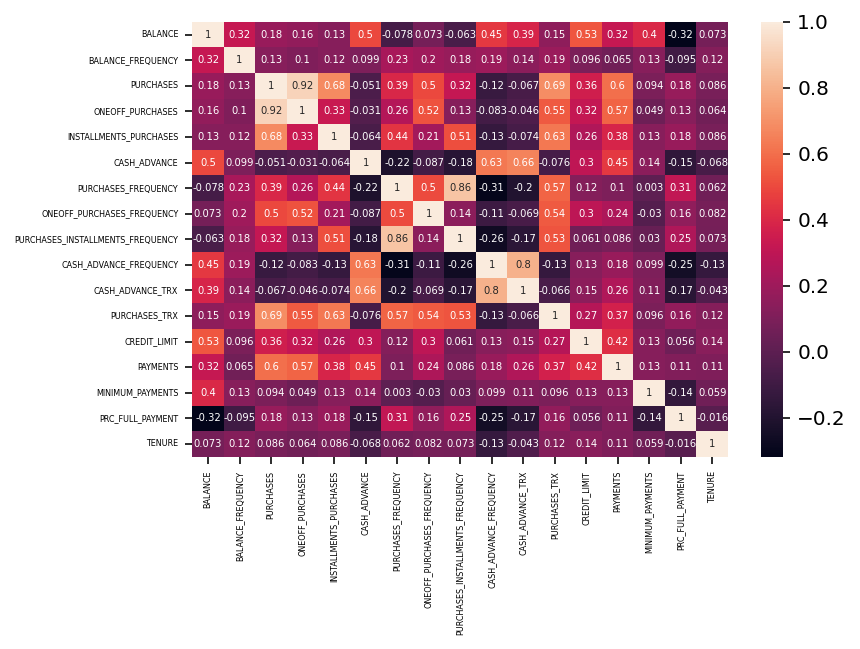

In [4]:
# set plot size
plt.rcParams['figure.figsize'] = (20, 13)
%matplotlib inline
%config InlineBackend.figure_format = "retina"

h = sns.heatmap(df.corr(), annot = True, annot_kws={"size": 5}) 
plt.xticks(size=4) 
plt.yticks(size=4) 
plt.show()

In [5]:
df = df.drop("CUST_ID", axis = 1)

In [6]:
df = df.dropna()
df2 = df.copy()

In [7]:
scaler = StandardScaler()
X = scaler.fit_transform(df)

In [8]:
range_n_clusters = [2, 6, 7, 8, 9, 10]

In [9]:
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)


For n_clusters = 2 The average silhouette_score is : 0.20892328220228673
For n_clusters = 6 The average silhouette_score is : 0.20427648931868725
For n_clusters = 7 The average silhouette_score is : 0.21998466824406415
For n_clusters = 8 The average silhouette_score is : 0.22726773465495584
For n_clusters = 9 The average silhouette_score is : 0.2202539896237458
For n_clusters = 10 The average silhouette_score is : 0.2252108358086424


In [10]:
km = KMeans(n_clusters=8, random_state= 10)
km.fit(X)
y_pred = km.predict(X)

In [11]:
df["Y_pred"] = y_pred
df.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Y_pred
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,4
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12,6
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12,2
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12,7
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.00,0,64,13500.0,6354.314328,198.065894,1.000000,12,1
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.00,0,12,2300.0,679.065082,532.033990,0.000000,12,7
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.00,0,5,7000.0,688.278568,311.963409,0.000000,12,2
9,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.00,0,3,11000.0,1164.770591,100.302262,0.000000,12,0
10,1293.124939,1.000000,920.12,0.00,920.12,0.000000,1.000000,0.000000,1.000000,0.00,0,12,1200.0,1083.301007,2172.697765,0.000000,12,7


In [12]:
df["Y_pred"].value_counts()

2    2688
7    1963
6    1097
0    1073
4     845
5     590
1     355
3      25
Name: Y_pred, dtype: int64

In [13]:
corr = df2.corr()
corr

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.310140,0.176083,0.159985,0.122109,0.495586,-0.088459,0.063832,-0.069582,0.445307,0.382388,0.147887,0.535518,0.322830,0.398669,-0.333594,0.066987
BALANCE_FREQUENCY,0.310140,1.000000,0.122635,0.095254,0.114739,0.089036,0.228158,0.187467,0.184159,0.181132,0.133265,0.183095,0.087682,0.039169,0.132519,-0.156961,0.104714
PURCHASES,0.176083,0.122635,1.000000,0.916780,0.679259,-0.053760,0.393000,0.497384,0.316025,-0.124863,-0.070277,0.688732,0.358425,0.606782,0.093842,0.176447,0.084545
ONEOFF_PURCHASES,0.159985,0.095254,0.916780,1.000000,0.329650,-0.033244,0.265460,0.524514,0.128380,-0.086413,-0.048705,0.545313,0.320613,0.570850,0.048741,0.129890,0.063400
INSTALLMENTS_PURCHASES,0.122109,0.114739,0.679259,0.329650,1.000000,-0.066099,0.441193,0.211829,0.511130,-0.136455,-0.076716,0.626083,0.258057,0.385391,0.132156,0.178440,0.083346
CASH_ADVANCE,0.495586,0.089036,-0.053760,-0.033244,-0.066099,1.000000,-0.218566,-0.090111,-0.178873,0.629030,0.656911,-0.078449,0.304161,0.459342,0.140094,-0.158566,-0.073090
PURCHASES_FREQUENCY,-0.088459,0.228158,0.393000,0.265460,0.441193,-0.218566,1.000000,0.502123,0.862338,-0.316771,-0.208749,0.567168,0.121372,0.100715,0.002979,0.305393,0.052161
ONEOFF_PURCHASES_FREQUENCY,0.063832,0.187467,0.497384,0.524514,0.211829,-0.090111,0.502123,1.000000,0.143911,-0.118225,-0.073384,0.544364,0.295432,0.244346,-0.030357,0.154073,0.080437
PURCHASES_INSTALLMENTS_FREQUENCY,-0.069582,0.184159,0.316025,0.128380,0.511130,-0.178873,0.862338,0.143911,1.000000,-0.268924,-0.172811,0.529192,0.063421,0.083424,0.030036,0.249547,0.065779
CASH_ADVANCE_FREQUENCY,0.445307,0.181132,-0.124863,-0.086413,-0.136455,0.629030,-0.316771,-0.118225,-0.268924,1.000000,0.799593,-0.136913,0.132841,0.182340,0.098844,-0.260001,-0.140038


In [14]:

df3 = df2.copy()

# Create correlation matrix
corr_matrix = df2.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.65
to_drop = [column for column in upper.columns if any(upper[column] > 0.65)]

# Drop features 
df3.drop(to_drop, axis=1, inplace=True)

<ipython-input-14-c74b5047a119>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [23]:
df3.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Y_pred
0,40.900749,0.818182,95.40,0.000000,0.166667,0.000000,0.00,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,6442.945483,0.000000,0.000000,0.25,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,0.000000,1.000000,1.000000,0.00,7500.0,622.066742,627.284787,0.000000,12,0
4,817.714335,1.000000,16.00,0.000000,0.083333,0.083333,0.00,1200.0,678.334763,244.791237,0.000000,12,2
5,1809.828751,1.000000,1333.28,0.000000,0.666667,0.000000,0.00,1800.0,1400.057770,2407.246035,0.000000,12,2


In [15]:
print(len(df3.columns))
print(len(df2.columns))

12
17


In [16]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
scaler_2 = StandardScaler()
X_new = scaler_2.fit_transform(df3)

In [17]:

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_new)
    silhouette_avg = silhouette_score(X_new, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)


For n_clusters = 2 The average silhouette_score is : 0.3104430330271573
For n_clusters = 3 The average silhouette_score is : 0.23722879824015913
For n_clusters = 4 The average silhouette_score is : 0.2143642956135704
For n_clusters = 5 The average silhouette_score is : 0.18022872829748052
For n_clusters = 6 The average silhouette_score is : 0.22758031880875926
For n_clusters = 7 The average silhouette_score is : 0.2037567550201734
For n_clusters = 8 The average silhouette_score is : 0.2086049006876806


In [20]:
km = KMeans(n_clusters=6, random_state= 10)
km.fit(X_new)
y_pred_new = km.predict(X_new)

In [21]:
df3["Y_pred"] = y_pred_new
df3.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Y_pred
0,40.900749,0.818182,95.40,0.000000,0.166667,0.000000,0.00,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,6442.945483,0.000000,0.000000,0.25,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,0.000000,1.000000,1.000000,0.00,7500.0,622.066742,627.284787,0.000000,12,0
4,817.714335,1.000000,16.00,0.000000,0.083333,0.083333,0.00,1200.0,678.334763,244.791237,0.000000,12,2
5,1809.828751,1.000000,1333.28,0.000000,0.666667,0.000000,0.00,1800.0,1400.057770,2407.246035,0.000000,12,2
6,627.260806,1.000000,7091.01,0.000000,1.000000,1.000000,0.00,13500.0,6354.314328,198.065894,1.000000,12,0
7,1823.652743,1.000000,436.20,0.000000,1.000000,0.000000,0.00,2300.0,679.065082,532.033990,0.000000,12,2
8,1014.926473,1.000000,861.49,0.000000,0.333333,0.083333,0.00,7000.0,688.278568,311.963409,0.000000,12,2
9,152.225975,0.545455,1281.60,0.000000,0.166667,0.166667,0.00,11000.0,1164.770591,100.302262,0.000000,12,1
10,1293.124939,1.000000,920.12,0.000000,1.000000,0.000000,0.00,1200.0,1083.301007,2172.697765,0.000000,12,2


In [22]:
df3["Y_pred"].value_counts()

2    3681
0    1953
1    1172
3    1089
5     636
4     105
Name: Y_pred, dtype: int64

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=18ef8167-d1fe-4cfd-a3a0-d5538e40e12b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>